In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv("desktop/Singapore_Real_Estate.csv")

In [4]:
df["year"] = df["month"].str.split("-", expand = True)[0]

In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,2015
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,2015
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,2015


In [6]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
year                   0
dtype: int64

In [7]:
df["storey_range"].sort_values(ascending = True).unique()

array(['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15',
       '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30',
       '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '43 TO 45',
       '46 TO 48', '49 TO 51'], dtype=object)

### All Flat Models and respective Resale Price

In [26]:
model_price = df.groupby("flat_model")["resale_price"].median().sort_values(ascending = False).reset_index()

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8195/3875097882.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8195/3875097882.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000')]

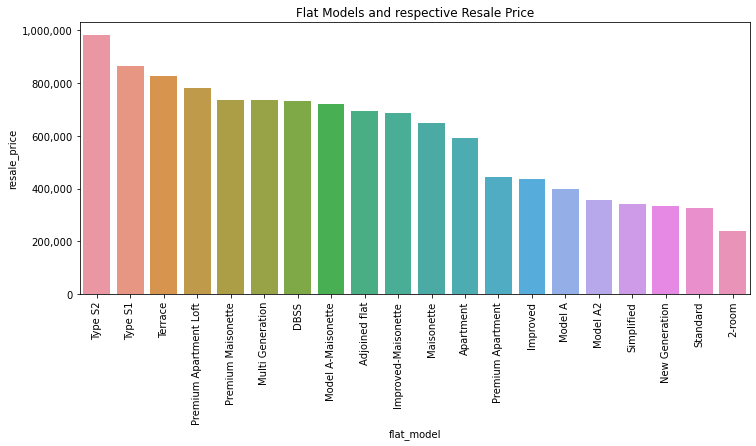

In [29]:
sns.barplot(data = model_price, x = "flat_model", y = "resale_price")
plt.xticks(rotation = 90)
plt.title("Flat Models and respective Resale Price")

current_values = plt.gca().get_yticks()

plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

### All Flat Models with respective Median Resale Price, Size, and Total Units Sold

In [27]:
model_count = df["flat_model"].value_counts().reset_index()
model_count = model_count.rename(columns = {"index": "flat_model", "flat_model": "units_sold"})

In [28]:
model_size = df.groupby("flat_model")["floor_area_sqm"].median().sort_values(ascending = False).reset_index()

In [12]:
temp_df = pd.merge(model_price, model_size, on="flat_model")
model_df = pd.merge(temp_df, model_count, on="flat_model")
print(model_df)

                flat_model  resale_price  floor_area_sqm  units_sold
0                  Type S2      980000.0           106.0          55
1                  Type S1      865000.0            94.0         137
2                  Terrace      826500.0           100.5          24
3   Premium Apartment Loft      780000.0           147.0           5
4       Premium Maisonette      736500.0           145.0           2
5         Multi Generation      735000.0           164.0           5
6                     DBSS      730000.0           108.0         205
7       Model A-Maisonette      720500.0           140.0          70
8            Adjoined flat      694000.0           146.5          50
9      Improved-Maisonette      685000.0           135.0           4
10              Maisonette      650000.0           146.0        1036
11               Apartment      590000.0           143.0        1422
12       Premium Apartment      443444.0           106.0        3526
13                Improved      43

### Correlation between 'Median Resale Price' and 'Median Floor Area' of all Flat Models 

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8195/3246796848.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_df["flat_model"], rotation = 90)


Text(0.5, 1.0, "Correlation between 'Median Resale Price' and 'Median Floor Area' of all Flat Models")

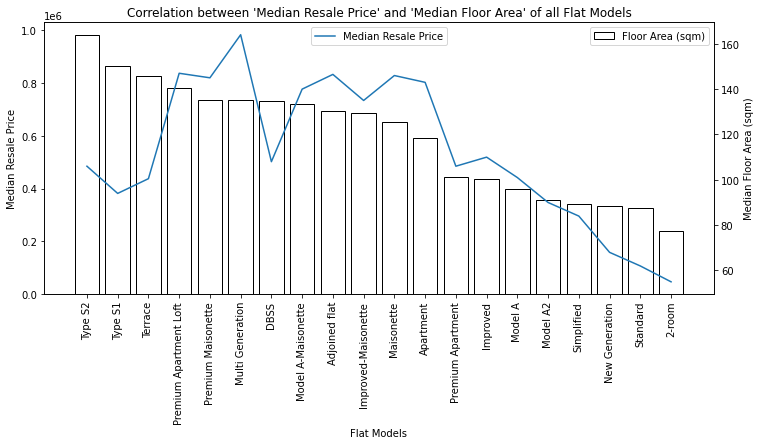

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.bar(model_df["flat_model"], model_df["resale_price"], color="white", edgecolor="black")
ax2.plot(model_df["flat_model"], model_df["floor_area_sqm"])

ax.legend(["Floor Area (sqm)"])
ax2.legend(["Median Resale Price"], loc="upper center")

ax.set_ylabel("Median Resale Price")
ax2.set_ylabel("Median Floor Area (sqm)")

ax.set_xlabel("Flat Models")

ax.set_xticklabels(model_df["flat_model"], rotation = 90)
plt.title("Correlation between 'Median Resale Price' and 'Median Floor Area' of all Flat Models")

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8195/2573050516.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_df["flat_model"], rotation = 90)


Text(0.5, 1.0, "Correlation between 'Median Resale Price' and 'Units Sold' of all Flat Models")

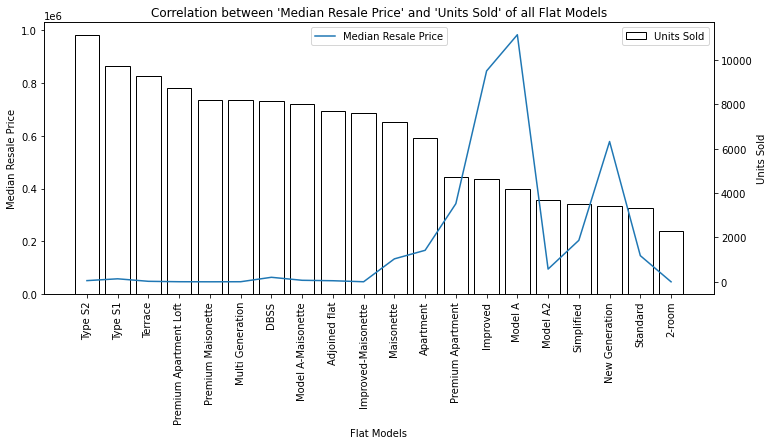

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.bar(model_df["flat_model"], model_df["resale_price"], color="white", edgecolor="black")
ax2.plot(model_df["flat_model"], model_df["units_sold"])

ax.legend(["Units Sold"])
ax2.legend(["Median Resale Price"], loc="upper center")

ax.set_ylabel("Median Resale Price")
ax2.set_ylabel("Units Sold")

ax.set_xlabel("Flat Models")

ax.set_xticklabels(model_df["flat_model"], rotation = 90)
plt.title("Correlation between 'Median Resale Price' and 'Units Sold' of all Flat Models")

### Top 10 Popular Flat Models with the Most Units Sold

In [15]:
top_10_model_count = df["flat_model"].value_counts().head(10).reset_index()
top_10_model_count = top_10_model_count.rename(columns={"index": "Flat Model", "flat_model": "Sold Count"})
print(top_10_model_count)

          Flat Model  Sold Count
0            Model A       11143
1           Improved        9511
2     New Generation        6328
3  Premium Apartment        3526
4         Simplified        1872
5          Apartment        1422
6           Standard        1181
7         Maisonette        1036
8           Model A2         576
9               DBSS         205


Text(0.5, 1.0, 'Top 10 Most Popular Flat Models')

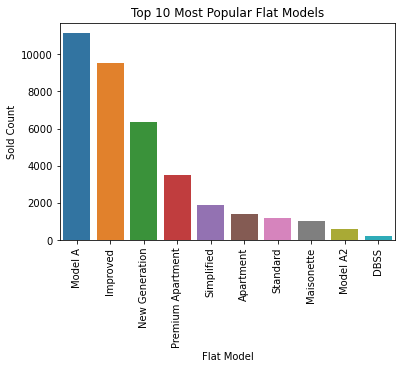

In [16]:
sns.barplot(data = top_10_model_count, x = "Flat Model", y = "Sold Count")
plt.xticks(rotation = 90)
plt.title("Top 10 Most Popular Flat Models")

### Monthly Changes of Median Resale Price from 2015-01 to 2016-12

Text(0.5, 1.0, 'Monthly Changes of Median Resale Price from 2015-01 to 2016-12')

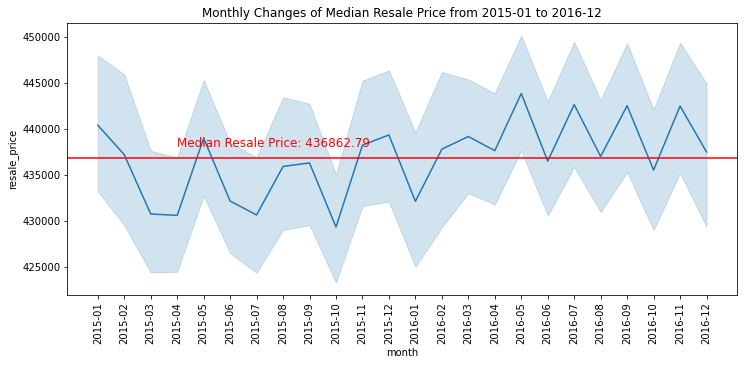

In [30]:
sns.lineplot(data = df, x = "month", y = "resale_price")
plt.xticks(rotation = 90)
plt.axhline(y = df.resale_price.mean(),
            color='red')
median = "Median Resale Price: " + str(round(df.resale_price.mean(), 2))
plt.text(3, 438000, median, fontsize=12, color = "r")
plt.rcParams["figure.figsize"] = (12,5)
plt.title("Monthly Changes of Median Resale Price from 2015-01 to 2016-12")

### Top 10 Towns with the Median Highest Resale Price

In [35]:
top_10_town = df.groupby("town")["resale_price"].median().sort_values(ascending = False).head(10).reset_index()

### Top 10 Most Popular Towns with the Most Units Sold from 2015 to 2016

In [34]:
top_10_town_count = df["town"].value_counts().head(10).reset_index()
top_10_town_count = top_10_town_count.rename(columns = {"index": "Town Name", "town": "Sold Count"})

### Top 10 Most Popular Towns and respective Median Square Meters

In [33]:
top_10_list = top_10_town_count["Town Name"].tolist()
filter = df["town"].isin(top_10_list)
top_10_df = df[filter]

top_10_df = top_10_df.groupby("town")["floor_area_sqm"].median().reset_index()
top_10_df = top_10_df.rename(columns = {"town":"Town Name", "floor_area_sqm": "Square Meter"})

### Top 10 Most Popular Towns and respective Median Resale Price 

In [32]:
top_10__df_2 = df[filter]
top_10__df_2 = top_10__df_2.groupby("town")["resale_price"].median().reset_index()
top_10__df_2 = top_10__df_2.rename(columns = {"town": "Town Name", "resale_price": "Median Resale Price"})

### Top 10 Most Popular Towns with respective Units Sold and Median Square Meter

In [31]:
town_size_count_df = pd.merge(top_10_df, top_10_town_count, on = "Town Name")
town_size_count_df = town_size_count_df.sort_values("Sold Count", ascending = False)

### Top 10 Most Popular Towns with respective Median Square Meter and Median Resale Price

In [23]:
town_df = pd.merge(town_size_count_df, top_10__df_2, on="Town Name")
town_df = town_df.sort_values("Sold Count", ascending = False)
print(town_df)

       Town Name  Square Meter  Sold Count  Median Resale Price
0    JURONG WEST         104.0        2888             400000.0
1       TAMPINES         104.0        2666             434500.0
2       SENGKANG          96.0        2619             435000.0
3      WOODLANDS         105.0        2599             383000.0
4          BEDOK          84.0        2442             373000.0
5         YISHUN          85.0        2154             345000.0
6        HOUGANG         101.0        1909             390000.0
7     ANG MO KIO          74.0        1851             355000.0
8  CHOA CHU KANG         108.0        1770             377000.0
9        PUNGGOL          96.0        1550             445000.0


### Correlation between 'Median Resale Price' and 'Total Units Sold' (Top 10 Towns)

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8195/2820475179.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(town_df["Town Name"], rotation = 90)


Text(0.5, 1.0, "Correlation between 'Median Resale Price' and 'Total Units Sold'")

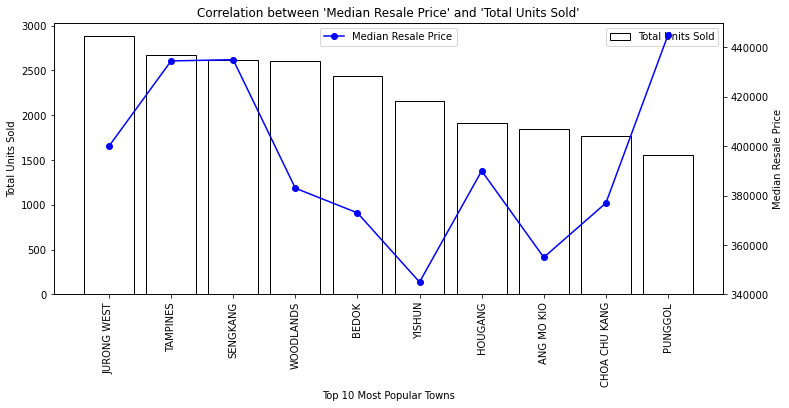

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.bar(town_df["Town Name"], town_df["Sold Count"], color="white", edgecolor = "black")
ax2.plot(town_df["Town Name"], town_df["Median Resale Price"], color="blue", marker = "o")

ax.legend(["Total Units Sold"])
ax2.legend(["Median Resale Price"], loc="upper center")

ax.set_ylabel("Total Units Sold")
ax2.set_ylabel("Median Resale Price")

ax.set_xlabel("Top 10 Most Popular Towns")

ax.set_xticklabels(town_df["Town Name"], rotation = 90)
plt.title("Correlation between 'Median Resale Price' and 'Total Units Sold'")

### Correlation between 'Unit Size' and 'Total Units Sold' (Top 10 Towns)

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8195/1041568523.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(town_df["Town Name"], rotation = 90)


Text(0.5, 1.0, "Correlation between 'Unit Size' and 'Total Units Sold'")

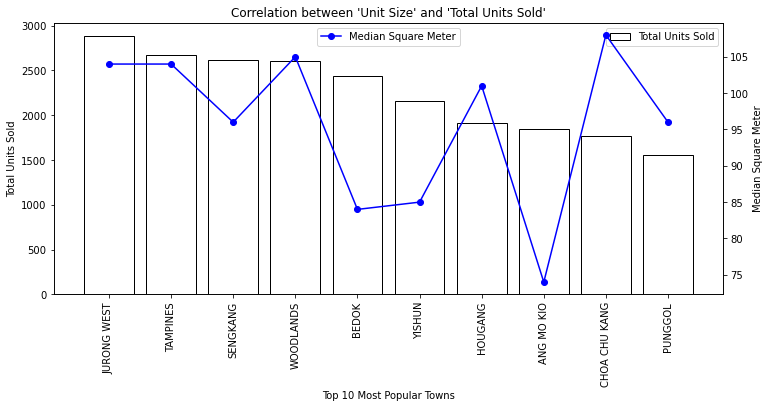

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.bar(town_df["Town Name"], town_df["Sold Count"], color="white", edgecolor = "black")
ax2.plot(town_df["Town Name"], town_df["Square Meter"], color="blue", marker="o")

ax.legend(["Total Units Sold"])
ax2.legend(["Median Square Meter"], loc="upper center")

ax.set_ylabel("Total Units Sold")
ax2.set_ylabel("Median Square Meter")

ax.set_xlabel("Top 10 Most Popular Towns")

ax.set_xticklabels(town_df["Town Name"], rotation = 90)

plt.title("Correlation between 'Unit Size' and 'Total Units Sold'")